In [4]:
#EXERCICE 1

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets 
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

Question A.1

In [47]:
data_file = "vib_aircraft_1a.csv"
datan = pd.read_csv(data_file)
data = pd.DataFrame(datan)
data

,acc_x,acc_y
0,0.001162,-4.3610
1,0.001562,1.3172
2,0.001962,5.6777
3,0.002362,7.8207
4,0.002762,8.7700
...,...,...
9995,3.998900,3.0466
9996,3.999300,10.5050
9997,3.999700,13.2660
9998,4.000100,9.9696


Question A.2

In [37]:
data.describe()

,acc_x,acc_y
count,10000.000000,10000.000000
mean,2.000818,0.010455
std,1.154673,7.553019
min,0.001162,-27.948000
25%,1.001000,-4.858950
50%,2.000800,-0.145710
75%,3.000600,5.042825
max,4.000500,29.184000


On a, via describe, les valeurs correspondants à la moyenne (mean), écart-type (std), les 3 quantiles Q1 (25%) Q2 (50%) et Q3 (75%), ainsi que les valeurs min et max et count le nombre totale de valeur. Donc les mesures de positions et de dispersions. pour ce qui est de acc_x on se rend compte que la moyene et Q2 sont égaux ce qui laisse présager une forme normale pour le plotbox, ce n'est pas le cas pour acc_y. Pour ce qui est de Q1 et Q3, pour acc_x la répartition semble symétrique, pas le cas pour acc_y. Encore une fois on peut avoir une idée sur la distribution plus ou mon snormale que acc_x semble suivre et acc_y non. 
On notera cependant la grande dispersion via la valeur de l'écart type de acc_y par rapport à acc_x qui peut démentire le raisonnement ci-dessus.
Prouvons cette supposition par la méthode graphique 


Question A.3

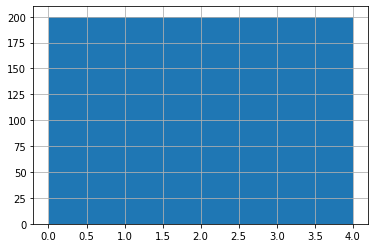

In [38]:
histacc_x = data['acc_x'].hist(bins=50)  #Bins nombre de barres

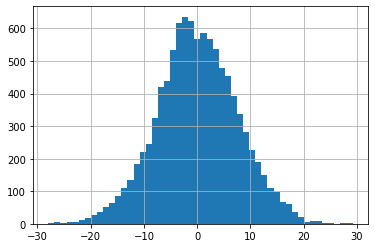

In [39]:
histacc_y = data['acc_y'].hist(bins=50)  #Bins nombre de barres

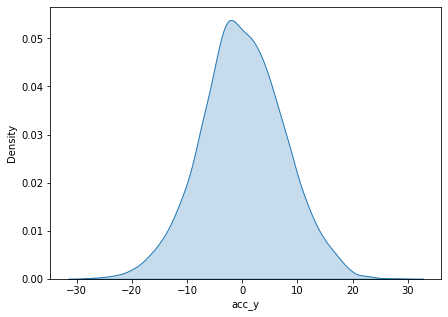

In [48]:
plt.figure(figsize=(7,5)) 
sns.kdeplot(data['acc_y'],shade=True) 
plt.show()

En analysant les historigrammes, on remarque que pour acc_x, la distribution ne ressemble pas du tout à une loi Normale tandis quer pour acc_y, la distribution se rapproche à celle d'une loi normale.
acc_y semble suivre une loi normale suivant cette méthode.

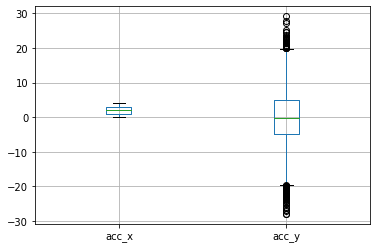

In [49]:
df = pd.DataFrame(data,
columns=['acc_x', 'acc_y'])
boxplot = df.boxplot(column=['acc_x', 'acc_y'])

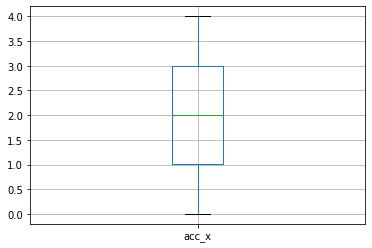

In [50]:
boxplot = df.boxplot(column=['acc_x'])

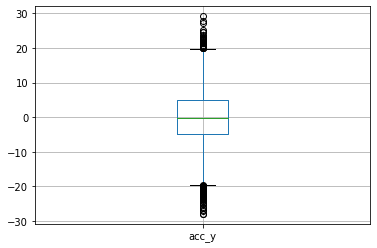

In [51]:
boxplot = df.boxplot(column=['acc_y'])

Après un zoom sur les boxplot, on remarque que les deux boxplots sont "coupés" au milieu par la moyenne et médiane, le tout en étant centrés autour de la médiane. Les deux acc_x et acc_y semblent suivre une loi normal via cette méthode. 

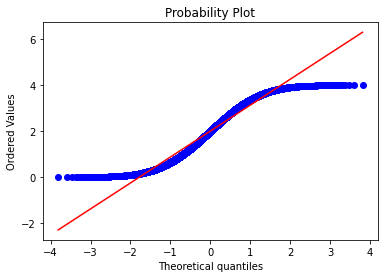

In [52]:
qq_plot_acc_x = stats.probplot(data['acc_x'], dist='norm',plot=pylab)

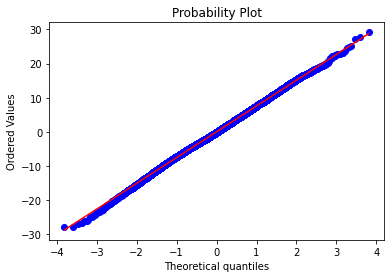

In [53]:
qq_plot_acc_y = stats.probplot(data['acc_y'], dist='norm',plot=pylab)

On remarque que acc_x ne suit pas la courbe de référence d'une distribution normale tandis que acc_y tend à converger vers celle-ci. Ainsi et selon cette méthode, acc_y suit une loi normale que acc_x ne suit pas.

Pour conclure, acc_y suivrait une loi normale selon les 3 méthodes tandis que acc_x suit une loi normale juste via boxplot. La normalité des données de acc_y peut être considérée, cette considération ne peut pas être effecuée pour acc_x

Question B.1 

In [54]:
data_file = "vib_flight_phases.csv"
datan = pd.read_csv(data_file)
data = pd.DataFrame(datan)
data

,air-blast,stabilization,landing
0,-4.3610,5.871623,-11.7190
1,1.3172,0.072109,-16.1800
2,5.6777,0.514440,-15.0530
3,7.8207,-11.094953,-9.6556
4,8.7700,-6.434641,-2.8009
...,...,...,...
9995,3.0466,8.910209,4.1882
9996,10.5050,4.565551,8.6056
9997,13.2660,-4.659858,13.7860
9998,9.9696,10.328305,13.7430


Question B.2

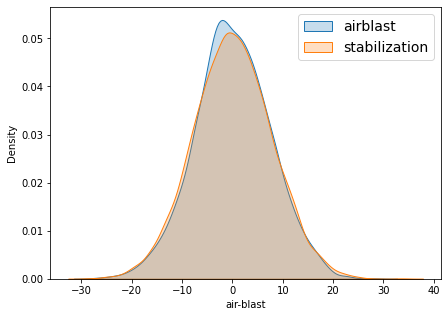

In [55]:
plt.figure(figsize=(7,5)) 
sns.kdeplot(data['air-blast'],shade=True) 
sns.kdeplot(data['stabilization'],shade=True) 
plt.legend(('airblast','stabilization'), fontsize = 14)
plt.show()
#Permet de donner une idée sur la tendanc normale des datas

In [61]:
#Test de normalité via Shapiro-Wilk
normality1 = stats.shapiro(data.loc['0':'4999','air-blast'])
normality2 = stats.shapiro(data.loc['5000':'9999','air-blast'])
print(normality1, normality2)

ShapiroResult(statistic=0.9991322159767151, pvalue=0.01243597362190485) ShapiroResult(statistic=0.9994705319404602, pvalue=0.17181505262851715)


In [59]:
#Test de normalité via Shapiro-Wilk
normality1 = stats.shapiro(data.loc['0':'4999','stabilization'])
normality2 = stats.shapiro(data.loc['5000':'9999','stabilization'])
print(normality1, normality2)

ShapiroResult(statistic=0.9996285438537598, pvalue=0.4933258295059204) ShapiroResult(statistic=0.9997165203094482, pvalue=0.755645215511322)


Pour les deux cas on valide le test de Shapiro-Wilk et donc on peut considérer les deux échantillons comme suivant une loi de distribution normale, en effet pour les deux la P-value est > 0,05.

Question B.3

In [60]:
#Test d’homogénéité 
homogeneity = stats.levene(data.loc['0':'4999','air-blast'], data.loc['5000':'9999','stabilization']) 
homogeneity

LeveneResult(statistic=28.13385218982659, pvalue=1.1562701052064659e-07)

On a une P-Value < 0,05 pour le test d'homogénéité, les deux échantillons ne sont pas homogènes et il faudrait en théorie utiliser une loi de probabilité non paramétrique.

Question B.4

Échantillons statistiques : les colonnes, air-blast, stabilization et landing
Population statistiques : les lignes, 0 1 ... 9999
Variables statistiques : Les valeurs du tableau en DataFrame, ce sont les datas

Question B.5 

On considère 2 hypothèses
H0 : Il n'y a pas de différence statistique significative sur le comportement vibratoire lors du décollage et de la phase de croisière
H1 : Il y a une différence statistique significative sur le comportement vibratoire lors du décollage et de la phase de croisière

On notera que les échantillons sont normales et homogènes (on suppose pour le test) et indépendant, dans notre cas les vibrations de la phase de décollage n'entraînent pas plus ou moins de vibration pour la phase de croisière.

On est dans le cas d'un test paramétrique, les 3 critères sont validés.

Question B.6
Compte tenue de la taille des données (Voir Shapiro-Wilk pour rester dans les hypothèses de la théorie), on utilisera un T-test indépendant.

In [16]:
#T-Test Indépendant
stats.ttest_ind(data.loc['0':'4999','air-blast'],data.loc['5000':'9999','stabilization'])

Ttest_indResult(statistic=0.7802305978333521, pvalue=0.4352736258019335)

Question B.7 

On a un P-value > 0,05, on accepte donc H0, Il n'y a pas de différence statistique significative sur le comportement vibratoire lors du décollage et de la phase de croisière 

Question B.8

Dans le cas de 3 échantillons, on ne peut plus utiliser le T-test, onutilisera alors un test ANOVA après vérifications des 3 critères de test Paramétrique.

EXERCICE 2

Question 1 & 2

In [17]:
data_file = "turbofan_engine_1.csv"
datan = pd.read_csv(data_file)
data = pd.DataFrame(datan)
data

,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,13.60,332.52,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,9.00,174.46,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,5.69,137.34,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,5.69,137.23,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,7.97,192.94,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,5.72,138.34,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,13.66,334.75,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,8.00,194.92,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,13.66,333.15,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


La dimension de la matrice est de 41214 x 24, à savoir 41214 prise de valeurs à l'aide de 24 sensors différents.

Question 3

In [18]:
# matrice de corrélation des caractéristiques

Corr=data.corr()
Corr

,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
opSetting1,1.000000,0.942476,-0.025167,-0.964226,-0.867514,-0.787419,-0.841118,-0.987350,-0.976428,-0.951440,...,-0.951009,-0.025146,-0.265769,0.461481,-0.840381,-0.790624,-0.441388,-0.025167,-0.961954,-0.961934
opSetting2,0.942476,1.000000,-0.061802,-0.882978,-0.807969,-0.758630,-0.836394,-0.931894,-0.927722,-0.917290,...,-0.917141,-0.061782,-0.358981,0.520609,-0.931183,-0.762070,-0.435498,-0.061802,-0.920287,-0.920235
opSetting3,-0.025167,-0.061802,1.000000,0.161177,0.476724,0.618920,0.541885,0.110387,0.194998,0.304239,...,0.305611,0.999999,0.936260,-0.881532,0.274933,0.614620,0.902753,1.000000,0.273685,0.273717
sensor1,-0.964226,-0.882978,0.161177,1.000000,0.944303,0.870693,0.898448,0.986239,0.986200,0.972784,...,0.972505,0.161145,0.355754,-0.542599,0.770001,0.873399,0.570013,0.161177,0.977406,0.977400
sensor2,-0.867514,-0.807969,0.476724,0.944303,1.000000,0.982002,0.981275,0.915925,0.944108,0.968583,...,0.968794,0.476699,0.629275,-0.777283,0.778092,0.982992,0.808411,0.476724,0.962445,0.962450
sensor3,-0.787419,-0.758630,0.618920,0.870693,0.982002,1.000000,0.989567,0.842611,0.884579,0.929134,...,0.929622,0.618918,0.759750,-0.877201,0.783061,0.998678,0.894656,0.618920,0.917271,0.917273
sensor4,-0.841118,-0.836394,0.541885,0.898448,0.981275,0.989567,1.000000,0.884688,0.920254,0.957530,...,0.957944,0.541886,0.722721,-0.848496,0.850321,0.990290,0.842462,0.541885,0.947414,0.947401
sensor5,-0.987350,-0.931894,0.110387,0.986239,0.915925,0.842611,0.884688,1.000000,0.996292,0.979642,...,0.979336,0.110358,0.333475,-0.525645,0.820055,0.845729,0.521476,0.110387,0.985644,0.985640
sensor6,-0.976428,-0.927722,0.194998,0.986200,0.944108,0.884579,0.920254,0.996292,1.000000,0.993198,...,0.993019,0.194970,0.411533,-0.595863,0.836119,0.887302,0.591873,0.194998,0.996330,0.996329
sensor7,-0.951440,-0.917290,0.304239,0.972784,0.968583,0.929134,0.957530,0.979642,0.993198,1.000000,...,0.999993,0.304216,0.514068,-0.684899,0.855591,0.931322,0.676916,0.304239,0.999147,0.999146


Question 4 & 5

In [19]:
# normalisation des données
normalisation = pd.DataFrame(StandardScaler().fit_transform(data), columns = data.columns, index = data.index)

# on applique l'Analyse en Composantes Principales sur les données
pca = PCA()
composantes_principales = pca.fit_transform(normalisation)
composantes_principales

array([[ 1.53720990e+00, -3.95090880e-01,  1.60407936e+00, ...,
         5.18391553e-05, -1.64228268e-05,  3.43726925e-15],
       [-6.05973761e+00,  4.35362830e+00,  2.09071948e-02, ...,
         3.44601121e-05,  1.32569627e-06,  3.57442302e-15],
       [-3.04562920e+00, -2.17758845e+00, -2.47543805e-01, ...,
         2.46057181e-04,  3.74163846e-05,  4.76999706e-13],
       ...,
       [-1.95103138e+00, -1.79748434e+00,  3.20976736e-02, ...,
         2.44349055e-04,  2.65344862e-05, -1.97802936e-16],
       [ 2.24847778e+00, -2.98764545e-01,  2.01138733e-01, ...,
        -1.71755038e-04, -6.73926406e-06, -2.95621359e-18],
       [-1.92761854e+00, -1.77911396e+00,  5.36768558e-02, ...,
         1.61247047e-04, -1.15130701e-05,  3.45000846e-17]])

Question 6

In [20]:
# valeurs propres
valeurs_propres = pca.explained_variance_

# pourcentage variance totale
var_ratio = pca.explained_variance_ratio_
var_ratio

array([7.72822545e-01, 2.00710338e-01, 2.23317954e-02, 1.52645009e-03,
       1.40930242e-03, 4.51688226e-04, 3.20309924e-04, 1.85875595e-04,
       6.49885169e-05, 5.64719135e-05, 4.71409636e-05, 4.26260013e-05,
       1.13583805e-05, 7.57480065e-06, 4.24217887e-06, 3.69871821e-06,
       2.07544473e-06, 1.14630830e-06, 2.51210454e-07, 9.71070064e-08,
       2.17921433e-08, 1.82216013e-09, 7.32955629e-12, 2.30323248e-31])

Question 7 & 8

In [62]:

valeurs_propres_pca = pd.DataFrame(valeurs_propres, index =['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24'], columns =['valeurs_propres'])

valeurs_propres_pca['var_ratio'] = var_ratio

valeurs_propres_pca['pourcentage'] = valeurs_propres_pca['var_ratio'].cumsum()

valeurs_propres_pca


,valeurs_propres,var_ratio,pourcentage
C1,1.854819e+01,7.728225e-01,0.772823
C2,4.817165e+00,2.007103e-01,0.973533
C3,5.359761e-01,2.233180e-02,0.995865
C4,3.663569e-02,1.526450e-03,0.997391
C5,3.382408e-02,1.409302e-03,0.998800
C6,1.084078e-02,4.516882e-04,0.999252
C7,7.687625e-03,3.203099e-04,0.999572
C8,4.461123e-03,1.858756e-04,0.999758
C9,1.559762e-03,6.498852e-05,0.999823
C10,1.355359e-03,5.647191e-05,0.999880


Question 9 

Question 10

In [23]:
principales_axes = pd.DataFrame(composantes_principales, index = data.index, columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24'])


Question 11

In [198]:
cp_turbofan = pd.DataFrame(abs(pca.components_[:3]), columns = data.columns, index =['C1','C2','C3'])
cp_turbofan

,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
C1,0.191869,0.190249,0.133631,0.204915,0.227140,0.230443,0.231478,0.202377,0.211319,0.220909,...,0.221014,0.133629,0.173456,0.202321,0.196185,0.230550,0.200511,0.133631,0.218458,0.218457
C2,0.252333,0.225541,0.372087,0.193978,0.048976,0.026513,0.016709,0.219619,0.184755,0.136781,...,0.136152,0.372100,0.285696,0.212760,0.114381,0.023973,0.225271,0.372087,0.150724,0.150709
C3,0.003139,0.369674,0.021828,0.254732,0.232954,0.127231,0.002621,0.107168,0.098179,0.062647,...,0.061993,0.021707,0.270582,0.183142,0.625150,0.126821,0.130147,0.021828,0.070655,0.070797


EXERCICE 3

Question 1.a

In [24]:
data_file = "CO2_emissions.csv"
datan = pd.read_csv(data_file, index_col=['Car','Model'])
data = pd.DataFrame(datan)
data

,,Volume,Weight,CO2,velocity,power
Car,Model,,,,,
Toyoty,Aygo,1055,845,154,282,155
Mitsubishi,Space Star,1255,1215,150,225,180
Skoda,Citigo,1055,984,150,253,182
Fiat,500,955,920,145,275,138
Mini,Cooper,1555,1195,160,233,195
VW,Up!,1055,984,160,216,165
Skoda,Fabia,1455,1164,145,273,209
Mercedes,A-Class,1555,1420,147,205,274
Ford,Fiesta,1555,1167,153,195,135


Question 1.b

In [25]:
Y=pd.DataFrame(data,columns=['CO2'])
Y

,,CO2
Car,Model,
Toyoty,Aygo,154
Mitsubishi,Space Star,150
Skoda,Citigo,150
Fiat,500,145
Mini,Cooper,160
VW,Up!,160
Skoda,Fabia,145
Mercedes,A-Class,147
Ford,Fiesta,153


In [26]:
X=pd.DataFrame(data,columns=['Weight']) 
X

,,Weight
Car,Model,
Toyoty,Aygo,845
Mitsubishi,Space Star,1215
Skoda,Citigo,984
Fiat,500,920
Mini,Cooper,1195
VW,Up!,984
Skoda,Fabia,1164
Mercedes,A-Class,1420
Ford,Fiesta,1167


In [27]:
Xi=X['Weight']  
x = np.array(Xi)
y=np.array(Y)
#Problème de taille-> on redimensionne
#Redimension -1 pour intégralité des lignes et 1 pour le nb de colonne, ici régression simple donc 1
Xi=x.reshape(-1,1)
y=y.reshape(-1,1)
lm=linear_model.LinearRegression() 
#Régresssion Linéaire Simple
SLR=lm.fit(Xi,Y)
SLR

LinearRegression()

Question 3.c

In [28]:
#B1
B1=SLR.coef_
#B0 
B0=SLR.intercept_ 
print(B0,B1)

[134.12441312] [[0.01699973]]


On a notre ordonnée à l'origine B0 = 134,12441312 et la pente B1 = 0.01699973 de notre modèle

In [29]:
R=SLR.score(Xi,y)
R

0.30486966019513095

On remarque que le score de notre estimateur est de 0,30 environ, ce qui représente une efficacité de 30% de notre modèle.
En ne prenant en compte que le poids en tant que paramètre impactant de l'émission de CO2, on a un modèle qui n'est pas réel (30% trop faible).

Question 2.a

In [30]:
X=pd.DataFrame(data,columns=['Weight','Volume','velocity','power']) 
X

,,Weight,Volume,velocity,power
Car,Model,,,,
Toyoty,Aygo,845,1055,282,155
Mitsubishi,Space Star,1215,1255,225,180
Skoda,Citigo,984,1055,253,182
Fiat,500,920,955,275,138
Mini,Cooper,1195,1555,233,195
VW,Up!,984,1055,216,165
Skoda,Fabia,1164,1455,273,209
Mercedes,A-Class,1420,1555,205,274
Ford,Fiesta,1167,1555,195,135


In [31]:
#Regression Linéaire Multiple
Xi=X
lm=linear_model.LinearRegression()
MLR= lm.fit(Xi,Y)

Question 2.b

In [32]:
#B1
B1=MLR.coef_
#B0 
B0=MLR.intercept_ 
print(B0,B1)

[123.00418934] [[0.00737506 0.00796549 0.04236426 0.00233445]]


On a notre ordonnée à l'origine B0 = 123.00418934 et la pente B1 = [[0.00737506 0.00796549 0.04236426 0.00233445]] de notre modèle. 
On remarque que B0 reste un scalaire et B1 devient un vecteur. Cette remarque est en accord avec la théorie.

Question 2.c

On a la formule du modèle suivante :
Y = B0 + B1.X ou Y = B.X avec B0 = 123.00418934 ; B1 = [[0.00737506 0.00796549 0.04236426 0.00233445]], X = [X1, X2, ..., X36] et X1 = [X1_Weight, X1_Volume, X1_velocity, X1_power]

Exemple : Y1 = CO2 de Toyota Aygo = 154 = B0 + B1.X1 = 123.00418934 +  [[0.00737506 0.00796549 0.04236426 0.00233445]] . [845, 1055, 282, 155]
De même pour tous les Yi et Xi 

Question 2.d

In [33]:
MLR.score(Xi,Y)

0.40316108114798055

Le score de cette estimation avec toutes les variables indépendantes est de 40% environ, c'est la valeur maximale que l'on puisse obtenir via les données.
Ainsi l'utilisation de la variable Weight comme unique valeur indépendante, avec un score de 30% environ, n'est pas si éloigné de la meilleure proposition de modèle posible. La Régression Linéaire Simple représente 75% du modèle de ce que l'on peut obtenir avec la Régression Linéaire Multiple avec toutes les variables.